## SVM Classification on Forest Cover Type Dataset

##  Forest Cover Type Dataset

###  Overview
The **Forest Cover Type** dataset is a real-world multi-class classification dataset from the **U.S. Forest Service**. The goal is to predict the **type of forest cover** based on cartographic features such as elevation, slope, and soil type.

---

### Source
- **UCI Machine Learning Repository**  
- [Forest Cover Type Dataset](https://archive.ics.uci.edu/ml/datasets/Covertype)

---

### Objective
To predict the **forest cover type (classes 1–7)** using 54 environmental and geographic features.

---

### Target Classes
There are 7 forest cover types (multi-class labels):
1. Spruce/Fir  
2. Lodgepole Pine  
3. Ponderosa Pine  
4. Cottonwood/Willow  
5. Aspen  
6. Douglas-fir  
7. Krummholz

---

### Features
- **Numerical Features**:
  - Elevation
  - Aspect (azimuth)
  - Slope
  - Horizontal & Vertical Distance to Hydrology
  - Horizontal Distance to Roadways
  - Hillshade at 9am, Noon, and 3pm

- **Binary/Categorical Features**:
  - 4 Wilderness Area indicators (one-hot encoded)
  - 40 Soil Type indicators (one-hot encoded)

---

### Dataset Size
- ~581,000 instances (rows)
- 54 input features + 1 target variable
- Suitable for benchmarking large-scale multi-class classification algorithms

---

### Why This Dataset?
- Real-world terrain and forest data
- Multi-class target variable (7 classes)
- Mixed feature types: continuous and binary
- Useful for testing classifiers like SVM, Random Forest, and Gradient Boosting


In [3]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
# 1. Load Dataset
data = fetch_covtype()
X = data.data
y = data.target
print("Features are \n",X)
print("Traget is\n",y)

Features are 
 [[2.596e+03 5.100e+01 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.590e+03 5.600e+01 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.804e+03 1.390e+02 9.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.386e+03 1.590e+02 1.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.384e+03 1.700e+02 1.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.383e+03 1.650e+02 1.300e+01 ... 0.000e+00 0.000e+00 0.000e+00]]
Traget is
 [5 5 2 ... 3 3 3]


In [7]:
# 2. Sample a subset (for speed)
from sklearn.utils import resample
X, y = resample(X, y, n_samples=5000, random_state=42, stratify=y)


In [8]:
# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [10]:
# 4. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled features",X_train_scaled)

Scaled features [[ 1.4951755  -0.73257327  1.72827107 ... -0.16737193  6.06101056
  -0.11807497]
 [-1.05697519  1.03006313  1.32560623 ... -0.16737193 -0.16498899
  -0.11807497]
 [-3.37121353 -0.80451762  2.39937915 ... -0.16737193 -0.16498899
  -0.11807497]
 ...
 [ 0.29479954 -1.25416976  0.52027654 ... -0.16737193 -0.16498899
  -0.11807497]
 [-1.61570875  1.64159005  2.26515753 ... -0.16737193 -0.16498899
  -0.11807497]
 [-2.08432399  1.20992399  2.13093592 ... -0.16737193 -0.16498899
  -0.11807497]]


In [11]:
# 5. Train SVM (with RBF kernel)
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_scaled, y_train)

SVC(C=10)

| Parameter       | Meaning                                                                                                                                                                                                                           |
| --------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `kernel='rbf'`  | **Radial Basis Function (RBF)** kernel, a type of non-linear kernel that maps input features into higher-dimensional space to find a better decision boundary. This is the default and most commonly used kernel.                 |
| `C=10`          | **Regularization parameter**. A **higher value of C** means the model will try to **fit the training data more closely** (low bias, high variance). A smaller C gives a **smoother decision boundary** (high bias, low variance). |
| `gamma='scale'` | Defines how far the influence of a single training example reaches. `'scale'` means it uses `1 / (n_features * X.var())` by default, which is usually a good starting point.                                                      |


In [13]:
# 6. Predict
y_pred = svm.predict(X_test_scaled)

In [16]:
# 7. Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.76      0.67      0.71       365
           2       0.75      0.87      0.81       488
           3       0.71      0.80      0.75        61
           4       0.50      0.40      0.44         5
           5       1.00      0.00      0.00        16
           6       0.37      0.23      0.29        30
           7       0.88      0.66      0.75        35

    accuracy                           0.75      1000
   macro avg       0.71      0.52      0.54      1000
weighted avg       0.75      0.75      0.74      1000



| Class | Precision | Recall | F1-score | Support | Observation                     |
| ----- | --------- | ------ | -------- | ------- | ------------------------------- |
| **1** | 0.76      | 0.67   | 0.71     | 365     | Decent, room to improve recall. |
| **2** | 0.75      | 0.87   | 0.81     | 488     | Very good, especially recall.   |
| **3** | 0.71      | 0.80   | 0.75     | 61      | Solid for a small class.        |
| **4** | 0.50      | 0.40   | 0.44     | 5       | Small sample, underperforming.  |
| **5** | 0.00      | 0.00   | 0.00     | 16      | 🚨 Not detected at all.         |
| **6** | 0.37      | 0.23   | 0.29     | 30      | Poor precision and recall.      |
| **7** | 0.88      | 0.66   | 0.75     | 35      | Good precision, okay recall.    |


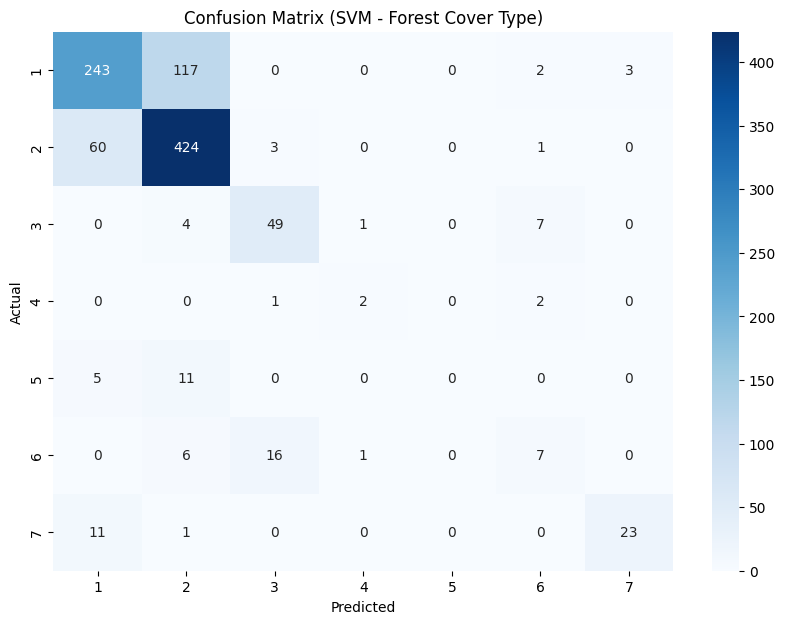

In [17]:
# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title("Confusion Matrix (SVM - Forest Cover Type)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Each row in the confusion matrix corresponds to the actual class, and each column to the predicted class.

Classes (Forest Cover Types):

1.Spruce/Fir

2.Lodgepole Pine

3.Ponderosa Pine

4.Cottonwood/Willow

5.Aspen

6.Douglas-fir

7.Krummholz



 ### Interpretation
Diagonal elements (in bold) are correctly predicted instances.

Off-diagonal values are misclassifications.

Key Observations:

Class 2 (Lodgepole Pine) has the highest correct predictions: 424, but also some misclassified as class 1.

Class 1 (Spruce/Fir) has 243 correct, but 117 were wrongly predicted as class 2. Suggests these two are hard to separate.

Class 3 to 7 have relatively fewer instances and more misclassifications.

Class 6 (Douglas-fir) shows confusion mostly with class 3.

## What This Tells Us:
SVM with RBF kernel is doing quite well in distinguishing major classes, especially 1 and 2.

There's overlap/confusion between similar forest types, especially Spruce/Fir and Lodgepole Pine.

Minority classes (like 4, 5, 6) are harder to classify due to fewer examples or overlapping features.

